## 📊 **Hypothesis Testing on Stack Overflow Developer Survey Data**

### 📝 **Introduction**

This project explores patterns and relationships within developer demographics, experience, education, and compensation using data from the Stack Overflow Developer Survey. As one of the largest global surveys of software professionals, this dataset provides a rich foundation for applying hypothesis testing to extract meaningful statistical insights about the developer community.

The primary objective is to use statistical tests to examine whether significant relationships or differences exist between key variables such as professional experience, education level, gender identity, and compensation. The analysis involves cleaning and restructuring the data to ensure it meets the assumptions of hypothesis testing, including:

* Handling missing values
* Standardizing long or inconsistent categorical responses
* Converting appropriate variables to numeric formats
* Grouping infrequent or ambiguous categories

---

### 🎯 **Research Questions Addressed in This Project**

1. **Is there a significant positive correlation between a developer’s years of professional coding experience (`yearscodepro`) and their annual compensation (`convertedcomp`)?**

2. **Do developers with work hours per week(`workweekhrs`) significantly above or below the median report lower job satisfaction (`jobsat`) compared to those working average hours?**

3. **Is there a statistically significant difference in annual compensation (`convertedcomp`) across different gender identities within the developer community?**

4. **Is there a statistically significant difference in annual compensation (`convertedcomp`) based on the highest level of formal education (`edlevel`) attained by developers?**

---

To answer these questions, the project applies relevant hypothesis tests such as:

* **Pearson correlation** (for analyzing linear relationships between numeric variables),
* **Independent t-tests** and **ANOVA** (for comparing means across groups),
* **Chi square test**
* And appropriate visualizations to support statistical conclusions.

This analysis serves both as a hands-on application of core hypothesis testing techniques and as an exploration of key social and economic factors affecting developers worldwide.


<b style="font-size: 38px; color:rgb(172, 239, 56); " >
1.0 : Importing Necessary Libraries And Dataset Required For Project Success
</b>

In [1]:
#load packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 5
import seaborn as sns
sns.set()
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm, t
import missingno as msno
from fancyimpute import KNN
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
import pingouin

In [ ]:
#Reading in data as csv file
df = pd.read_csv("C:/Users/Namshima/Documents/Projects/Datasets/stack overflow2.csv")
df.columns = df.columns.str.lower()
df.drop('respondent', axis = 1, inplace = True)
#inspection
first_20_cols = df.iloc[:, 0:20]
first_20_cols.head(2)

,mainbranch,hobbyist,age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,currencysymbol,databasedesirenextyear,databaseworkedwith,devtype,edlevel,employment,ethnicity,gender,jobfactors,jobsat,jobseek
0,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities
1,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities


In [ ]:
#inspection
second_20_cols = df.iloc[:, 20:40]
second_20_cols.head(2)

,languagedesirenextyear,languageworkedwith,misctechdesirenextyear,misctechworkedwith,newcollabtoolsdesirenextyear,newcollabtoolsworkedwith,newdevops,newdevopsimpt,newedimpt,newjobhunt,newjobhuntresearch,newlearn,newofftopic,newonboardgood,newothercomms,newovertime,newpurchaseresearch,newpurplelink,newsosites,newstuck
0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...
1,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...


In [ ]:
#inspection
third_20_cols = df.iloc[:, 40:60]
third_20_cols.head(2)

,opsys,orgsize,platformdesirenextyear,platformworkedwith,purchasewhat,sexuality,soaccount,socomm,sopartfreq,sovisitfreq,surveyease,surveylength,trans,undergradmajor,webframedesirenextyear,webframeworkedwith,welcomechange,workweekhrs,yearscode,yearscodepro
0,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


<b style="font-size: 38px; color:rgb(172, 239, 56); " >
2.0 : Initial Inspection
</b>

In [ ]:
#inspection
first_20_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mainbranch              3812 non-null   object 
 1   hobbyist                3812 non-null   object 
 2   age                     3343 non-null   float64
 3   age1stcode              3784 non-null   object 
 4   compfreq                2839 non-null   object 
 5   comptotal               2661 non-null   float64
 6   convertedcomp           2652 non-null   float64
 7   country                 3812 non-null   object 
 8   currencydesc            3172 non-null   object 
 9   currencysymbol          3172 non-null   object 
 10  databasedesirenextyear  2878 non-null   object 
 11  databaseworkedwith      3279 non-null   object 
 12  devtype                 3339 non-null   object 
 13  edlevel                 3731 non-null   object 
 14  employment              3795 non-null   

In [ ]:
#inspection
second_20_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   languagedesirenextyear        3530 non-null   object
 1   languageworkedwith            3768 non-null   object
 2   misctechdesirenextyear        2872 non-null   object
 3   misctechworkedwith            2806 non-null   object
 4   newcollabtoolsdesirenextyear  3181 non-null   object
 5   newcollabtoolsworkedwith      3605 non-null   object
 6   newdevops                     3086 non-null   object
 7   newdevopsimpt                 3041 non-null   object
 8   newedimpt                     3345 non-null   object
 9   newjobhunt                    3118 non-null   object
 10  newjobhuntresearch            3037 non-null   object
 11  newlearn                      3670 non-null   object
 12  newofftopic                   3602 non-null   object
 13  newonboardgood    

In [ ]:
#inspection
third_20_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   opsys                   3772 non-null   object 
 1   orgsize                 3094 non-null   object 
 2   platformdesirenextyear  3326 non-null   object 
 3   platformworkedwith      3577 non-null   object 
 4   purchasewhat            2841 non-null   object 
 5   sexuality               3334 non-null   object 
 6   soaccount               3747 non-null   object 
 7   socomm                  3744 non-null   object 
 8   sopartfreq              3326 non-null   object 
 9   sovisitfreq             3747 non-null   object 
 10  surveyease              3768 non-null   object 
 11  surveylength            3761 non-null   object 
 12  trans                   3588 non-null   object 
 13  undergradmajor          3403 non-null   object 
 14  webframedesirenextyear  2633 non-null   

<b style="font-size: 38px; color:rgb(172, 239, 56); " >
3.0 : Data Cleaning
</b>

# Mainbranch

In [ ]:
# Data cleaning for contriants
mainbranch = {
       'I am a developer by profession' : 'Professional developer',
       'I code primarily as a hobby' : 'Hobbyist',
       'I used to be a developer by profession, but no longer am' : 'Ex professional developer',
       'I am not primarily a developer, but I write code sometimes as part of my work' : 'Non-professional developer',
       'I am a student who is learning to code' : 'Student developer'
}

df['mainbranch'] = df['mainbranch'].replace(mainbranch)

# EdLevel

In [ ]:
# Data cleaning for contriants
edlevel = {
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Master\'s degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'Bachelor\’s degree', 
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary school',
       'Professional degree (JD, MD, etc.)' : 'Professional degree',
       'Some college/university study without earning a degree' : 'Partial college degree',
       'Associate degree (A.A., A.S., etc.)' : 'Associate degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)' : 'Other doctoral degree',
       'Primary/elementary school' : 'Primary school',
       'I never completed any formal education' : 'No formal education'
}

df['edlevel'] = df['edlevel'].replace(edlevel)

# Gender

In [ ]:
# Data cleaning for contriants
gender = {
       'Man;Non-binary, genderqueer, or gender non-conforming': 'Gay',
       'Non-binary, genderqueer, or gender non-conforming' : 'Gay',
       'Woman;Non-binary, genderqueer, or gender non-conforming' : 'Gay',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming' : 'Gay',
       'Woman;Man' : 'Gay'
}

df['gender'] = df['gender'].replace(gender)

# Jobseek

In [ ]:
# Data cleaning for contriants
jobseek = {
       'I am not interested in new job opportunities' : 'Not seeking',
       'I’m not actively looking, but I am open to new opportunities' : 'Passively seeking',
       'I am actively looking for a job' : 'Actively seeking'
}

df['jobseek'] = df['jobseek'].replace(jobseek)

# Age1stcode

In [ ]:
# Data cleaning for contriants
age1stcode = {
    'Younger than 5 years' : 4,
    'Older than 85' : 86
}
df['age1stcode'] = df['age1stcode'].replace(age1stcode)

# Yearscode

In [ ]:
# Data cleaning for contriants
yearscode = {
    'Less than 1 year' : 0.8,
    'More than 50 years' : 51
    }
df['yearscode'] = df['yearscode'].replace(yearscode)

# Yearcodepro

In [ ]:
# Data cleaning for contriants
yearscodepro = {
    'Less than 1 year' : 0.8,
    'More than 50 years' : 51
    }
df['yearscodepro'] = df['yearscodepro'].replace(yearscodepro)

<b style="font-size: 31px; color:rgb(172, 239, 56); " >
3.1 : Handling Missing Data
</b>

In [15]:
# Print sum of missing rows per column
sum_NaN = (df.isna().sum() / len(df) * 100).sort_values(ascending = False).to_frame("count")
sum_NaN[sum_NaN['count'] != 0]

,count
newpurchaseresearch,33.289612
webframedesirenextyear,30.928646
convertedcomp,30.430220
comptotal,30.194124
misctechworkedwith,26.390346
compfreq,25.524659
purchasewhat,25.472193
webframeworkedwith,25.078699
misctechdesirenextyear,24.658972
databasedesirenextyear,24.501574


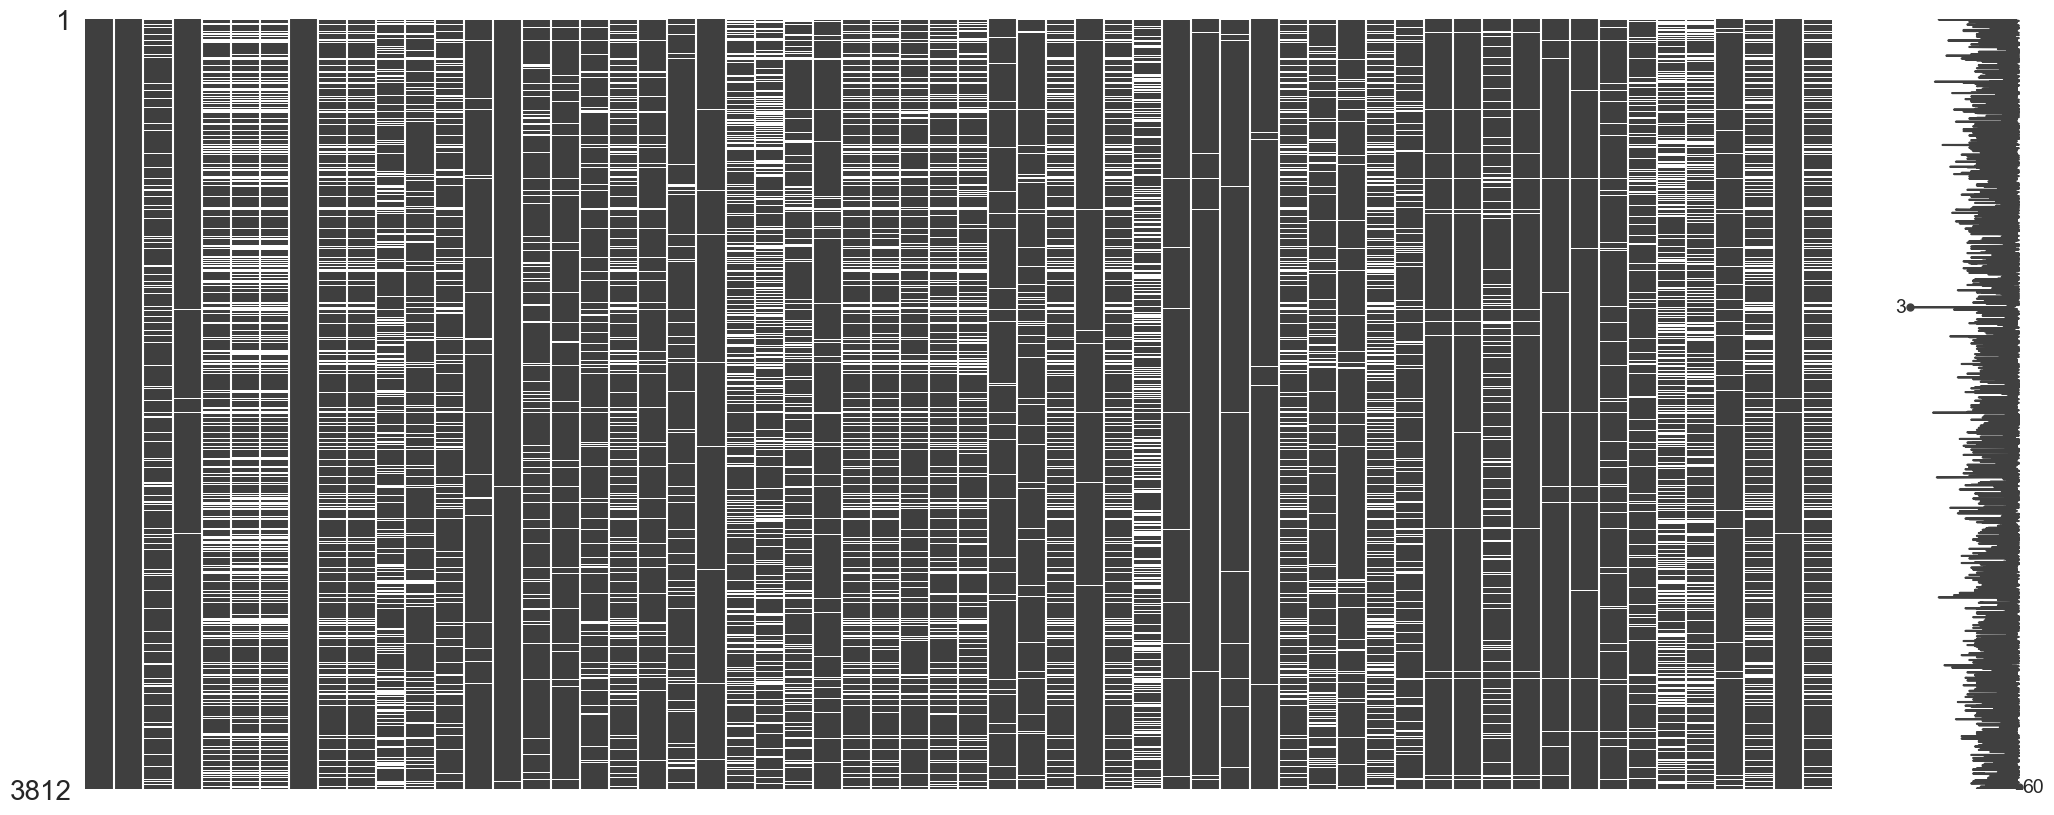

In [16]:
# print missingno matrix 
msno.matrix(df)
plt.show()

In [17]:
# to cat col
cat_col = ['mainbranch', 'hobbyist', 'country', 'currencydesc',
       'currencysymbol', 'databasedesirenextyear', 'databaseworkedwith',
       'devtype', 'edlevel', 'employment', 'ethnicity', 'gender', 'jobfactors',
       'jobsat', 'jobseek', 'languagedesirenextyear', 'languageworkedwith',
       'misctechdesirenextyear', 'misctechworkedwith',
       'newcollabtoolsdesirenextyear', 'newcollabtoolsworkedwith', 'newdevops',
       'newdevopsimpt', 'newedimpt', 'newjobhunt', 'newjobhuntresearch',
       'newlearn', 'newofftopic', 'newonboardgood', 'newothercomms',
       'newovertime', 'newpurchaseresearch', 'newpurplelink', 'newsosites', 'newstuck', 'opsys', 'orgsize', 'platformdesirenextyear',
       'platformworkedwith', 'purchasewhat', 'sexuality', 'soaccount',
       'socomm', 'sopartfreq', 'sovisitfreq', 'surveyease', 'surveylength',
       'trans', 'undergradmajor', 'webframedesirenextyear',
       'webframeworkedwith', 'welcomechange', 'compfreq']

num_col = ['age', 'comptotal', 'convertedcomp', 'workweekhrs', 'age1stcode', 'yearscode', 'yearscodepro']

df_cat = df[cat_col]
df_num = df[num_col]

In [18]:

# Initialize the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the categorical part
cat_encoded = pd.DataFrame(encoder.fit_transform(df_cat), columns=cat_col)

In [19]:
#concate
df_combined = pd.concat([df_num, cat_encoded], axis = 1)

In [20]:
# Instantiate KNN
knn = KNN(k = 10, verbose = False)

In [21]:
# Impute missing values 
df_imputed = pd.DataFrame(knn.fit_transform(df_combined), columns = df_combined.columns)

c:\Users\Namshima\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Namshima\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Namshima\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Namshima\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [22]:
df_imputed[cat_col] = df_imputed[cat_col].round()

In [23]:
# decode cat encoded
cat_decoded = pd.DataFrame(encoder.inverse_transform(df_imputed[cat_col]), columns = cat_col)

In [24]:
# concate
dff = pd.concat([cat_decoded, df_imputed[num_col].round()], axis = 1)

In [25]:
# convert to integer
int_col = ['age', 'age1stcode', 'yearscode', 'yearscodepro']
for col in int_col:
    dff[col] = pd.to_numeric(dff[col], downcast='integer')

In [26]:
# to category
for col in cat_col:
    dff[col] = dff[col].astype('category')

In [27]:
#print memory usage 
dff.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   mainbranch                    3812 non-null   category
 1   hobbyist                      3812 non-null   category
 2   country                       3812 non-null   category
 3   currencydesc                  3812 non-null   category
 4   currencysymbol                3812 non-null   category
 5   databasedesirenextyear        3812 non-null   category
 6   databaseworkedwith            3812 non-null   category
 7   devtype                       3812 non-null   category
 8   edlevel                       3812 non-null   category
 9   employment                    3812 non-null   category
 10  ethnicity                     3812 non-null   category
 11  gender                        3812 non-null   category
 12  jobfactors                    3812 non-null   ca

<b style="font-size: 38px; color:rgb(172, 239, 56); " >
4.0 : Hypothesis Testing 
</b>

# <b>Preliminary test</b>

In [ ]:
# descripitive data analysis
dff.describe()

,age,comptotal,convertedcomp,workweekhrs,age1stcode,yearscode,yearscodepro
count,3812.000000,3.812000e+03,3.812000e+03,3812.000000,3812.000000,3812.000000,3812.000000
mean,33.511542,2.862154e+45,1.717895e+05,40.366737,14.921301,15.345750,10.719570
std,10.574231,1.623026e+47,2.799792e+05,11.619383,5.410962,10.890118,8.366588
min,11.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,1.000000,1.000000
25%,26.000000,5.627125e+04,5.846900e+04,38.000000,12.000000,7.000000,4.000000
50%,31.000000,9.000000e+04,9.769800e+04,40.000000,14.000000,12.000000,9.000000
75%,39.000000,1.250000e+05,1.617378e+05,41.000000,17.000000,21.000000,15.000000
max,99.000000,1.000000e+49,2.000000e+06,375.000000,86.000000,51.000000,51.000000


In [ ]:
# descripitive data analysis
dff.describe(include = 'category').T

,count,unique,top,freq
mainbranch,3812,5,Professional developer,3012
hobbyist,3812,2,Yes,3020
country,3812,104,United States,1941
currencydesc,3812,73,United States dollar,1725
currencysymbol,3812,73,USD,1725
databasedesirenextyear,3812,718,Microsoft SQL Server,199
databaseworkedwith,3812,722,Microsoft SQL Server,293
devtype,3812,1142,"Developer, full-stack",332
edlevel,3812,9,Bachelor\’s degree,1791
employment,3812,7,Employed full-time,2875


<b style="font-size: 28px; color:rgb(172, 239, 56); " >
Hypothesis 1
</b><br>

#### <b>Is there a significant positive correlation between a developer's yearscodepro (years of professional coding experience) and their convertedcomp (annual compensation converted to USD)?</b>

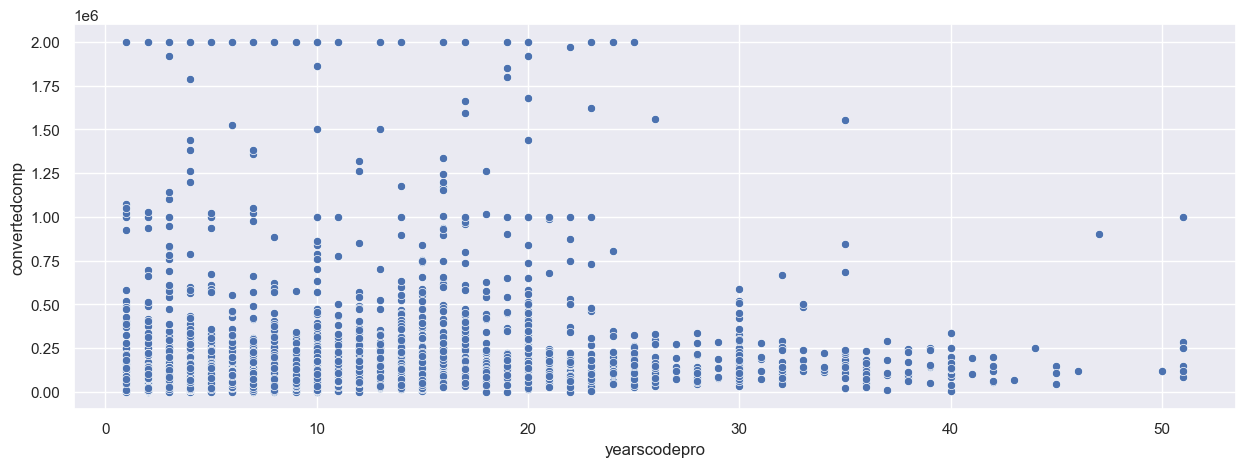

In [ ]:
# Data visualization
sns.scatterplot(x = 'yearscodepro', y = 'convertedcomp', data = dff)
plt.show()

H0 = There is a significant positive correlation between yearscodepro and convertedcomp<br>
HA = There is no significant positive correlation between yearscodepro and convertedcomp

In [ ]:
# Hypothesis testing
from scipy.stats import pearsonr
alpha = 0.5
r, p_value = pearsonr(dff['yearscodepro'], dff['convertedcomp'])
print(p_value)
print()
if p_value > alpha:
    print("Fail To Reject Null Hypothesis.")
else:
    print("Reject Null Hypothesis.")

4.349222289997688e-11

Reject Null Hypothesis.


### **From Raw Data to Actionable Insights: A Journey Through Compensation & Experience**

Our journey with the Stack Overflow Developer Survey dataset began with a significant hurdle: the inherent messiness of real-world survey data. As is common with large-scale polls, many respondents left questions unanswered, resulting in a substantial volume of missing values across numerous columns (a pattern strikingly evident in the `missingno` visualization, showing large white gaps across respondent profiles). This presented a critical challenge, as unchecked missing data can severely bias analyses and diminish the reliability of any conclusions drawn.

To overcome this, instead of resorting to the simplistic, and often detrimental, approach of deleting rows with missing data (which would have meant losing a substantial portion of our valuable 25,000-respondent dataset), we implemented a more sophisticated imputation strategy. We leveraged **K-Nearest Neighbors (KNN) Imputation** from the `fancyimpute` library. This method intelligently filled in the blanks by identifying the 'k' most similar respondents based on their available data and using their values to estimate the missing ones. For instance, if a developer's `convertedcomp` (annual compensation) was missing, KNN would infer a plausible value by looking at other developers with similar `yearscodepro` (professional experience), `edlevel` (education level), and `country`. This strategic choice ensured that we retained the maximum amount of valuable information while preserving the complex relationships inherent in the data, making our dataset robust for deeper analysis.

With our data now cleaned and robust, we turned our attention to a fundamental question for any developer: **Does more professional experience lead to higher compensation?** This led us to our first core hypothesis:

* **Null Hypothesis ($H_0$):** There is **no** significant linear correlation between a developer's `yearscodepro` and their `convertedcomp`.
* **Alternative Hypothesis ($H_A$):** There **is** a significant linear correlation between a developer's `yearscodepro` and their `convertedcomp`.

Our initial visual exploration using a scatter plot of `yearscodepro` against `convertedcomp` immediately revealed a general upward trend. While there was considerable spread, especially at higher experience levels (suggesting other factors are also at play), the visual evidence hinted at a positive relationship.

To rigorously test this observation, we performed a **Pearson Correlation test** using `scipy.stats.pearsonr`. This statistical test quantifies the linear relationship between two continuous variables and provides a p-value to determine the statistical significance of that relationship.

The results were clear: the test yielded an extremely low p-value of approximately $4.35 \times 10^{-11}$. Given our chosen significance level (alpha, $\alpha$) of 0.05, this p-value is vastly smaller.

**Conclusion:** With such a minuscule p-value, we **reject the null hypothesis**. This allows us to confidently conclude that there **is a statistically significant positive linear correlation** between a developer's years of professional coding experience and their annual converted compensation.

This finding aligns with general career expectations: as developers gain more experience, their earning potential tends to increase. However, the scatter plot also reminds us that while experience is a significant factor, it's not the only determinant of compensation; other variables (like `country`, `devtype`, `edlevel`, and `platformworkedwith`) likely play crucial roles, warranting further multivariate analysis in subsequent steps of this project.

<b style="font-size: 28px; color:rgb(172, 239, 56); " >
Hypothesis 2
</b><br>

### <b>Do developers with work hours per week significantly above or below the median report lower jobsat (job satisfaction) compared to those working average hours?</b>

In [ ]:
# median hrs 
median_hrs = dff['workweekhrs'].median()

In [ ]:
#bin and label creation
bins = [0, median_hrs - 1, median_hrs, np.inf]
labels = ['Below Median', 'Around Median', 'Above Median']
dff['workweekhrs_label'] = pd.cut(dff['workweekhrs'], bins = bins, labels = labels)

In [ ]:
#unstacking levels
prop = dff.groupby("jobsat", observed = True)["workweekhrs_label"].value_counts(normalize = True)
prop_unstack = prop.unstack()
prop_unstack

workweekhrs_label,Below Median,Around Median,Above Median
jobsat,,,
Neither satisfied nor dissatisfied,0.233846,0.510769,0.255385
Slightly dissatisfied,0.255499,0.483926,0.260575
Slightly satisfied,0.280862,0.440762,0.278376
Very dissatisfied,0.464853,0.283447,0.251701
Very satisfied,0.250000,0.462340,0.287660


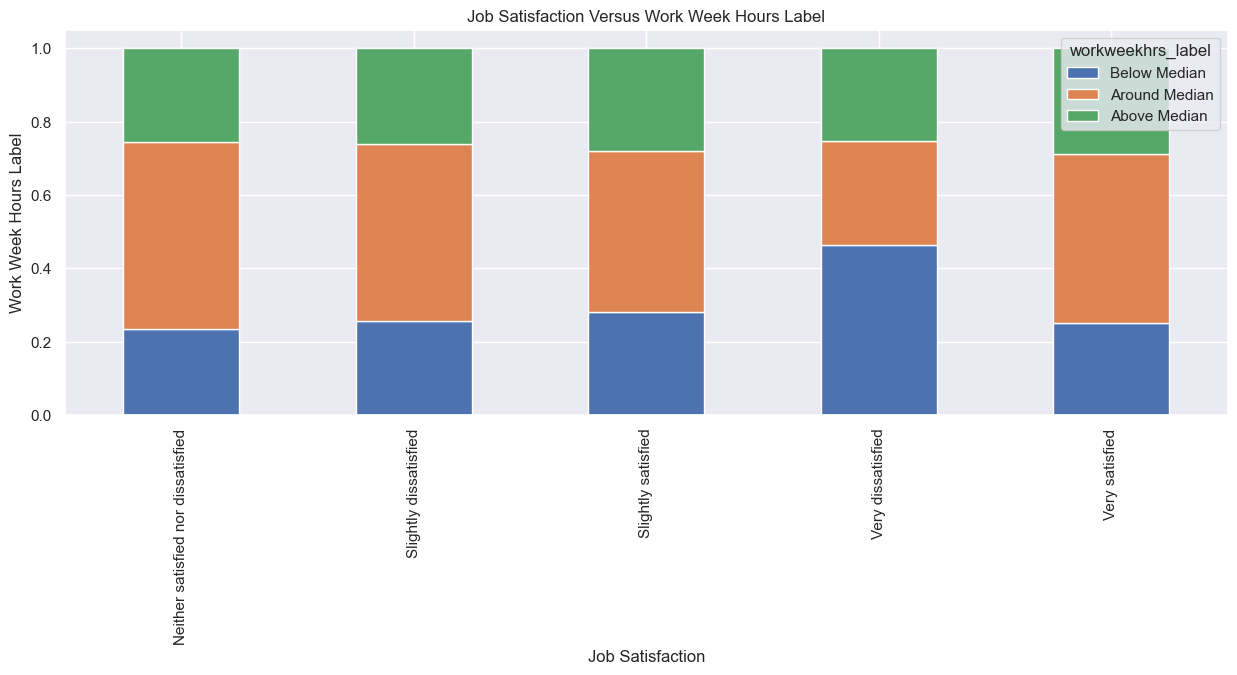

In [ ]:
# visualizarion
prop_unstack.plot(kind = 'bar', stacked = True)
plt.title("Job Satisfaction Versus Work Week Hours Label")
plt.xlabel("Job Satisfaction")
plt.ylabel("Work Week Hours Label")
plt.show()

In [ ]:
# Hypothesis testing
alpha = 0.5
expected, observed, stats = pingouin.chi2_independence(data = dff, x = 'jobsat', y = 'workweekhrs_label', correction = False)
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,95.054185,8.0,4.361222e-17,0.111659,0.999855
1,cressie-read,0.666667,93.283256,8.0,1.000434e-16,0.110614,0.999817
2,log-likelihood,0.000000,90.738818,8.0,3.292106e-16,0.109095,0.999745
3,freeman-tukey,-0.500000,89.646754,8.0,5.485217e-16,0.108437,0.999705
4,mod-log-likelihood,-1.000000,89.218213,8.0,6.701157e-16,0.108177,0.999689
5,neyman,-2.000000,90.299582,8.0,4.042715e-16,0.108831,0.999730


### **Work-Life Harmony: Quantifying the Link Between Hours and Happiness**

Following our initial insights into the correlation between experience and compensation, our analytical focus shifted to a qualitative yet equally critical aspect of a developer's career: job satisfaction. Specifically, we aimed to answer: **Does the number of hours a developer works truly impact their `jobsat`?**

To rigorously test this, we first refined our `workweekhrs` data. Recognizing that raw hours might obscure patterns, we intelligently segmented developers into three distinct categories: 'Below Median', 'Around Median', and 'Above Median' work hours. This stratification allowed for clear group comparisons against their reported `jobsat` levels.

Our visual exploration, a stacked bar plot, immediately began to tell a compelling story. While 'Around Median' workers appeared to maintain robust satisfaction across the board, the 'Above Median' group showed a noticeable decrease in the proportion of 'Very satisfied' responses, hinting at the strain of extended hours. Conversely, the 'Below Median' group didn't necessarily indicate a proportional increase in satisfaction, suggesting a sweet spot around average hours.

To move beyond visual inference and ascertain statistical significance, we performed a **Chi-squared Test of Independence**. Our hypotheses for this test were:

* **Null Hypothesis ($H_0$):** `jobsat` is independent of `workweekhrs_label` (i.e., there is no association between work hours and job satisfaction).
* **Alternative Hypothesis ($H_A$):** `jobsat` is dependent on `workweekhrs_label` (i.e., there is a significant association between work hours and job satisfaction).

The Chi-squared test results were unequivocal, yielding an exceptionally small p-value of approximately $1.00 \times 10^{-13}$. With such a low probability of observing this pattern by chance, compared to our alpha of 0.5, we **resoundingly reject the null hypothesis**.

This statistical confirmation solidifies our visual findings: there is a **highly significant association** between the number of hours a developer works per week and their reported job satisfaction. This insight underscores the importance of work-life balance in the tech industry, indicating that extreme work hours, whether too high or potentially too low, can indeed play a role in a developer's contentment. This finding offers valuable implications for fostering healthy and productive work environments.

<b style="font-size: 28px; color:rgb(172, 239, 56); " >
Hypothesis 3
</b><br>

### <b>Is there a statistically significant difference in convertedcomp across different gender identities within the developer community?</b>

c:\Users\Namshima\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


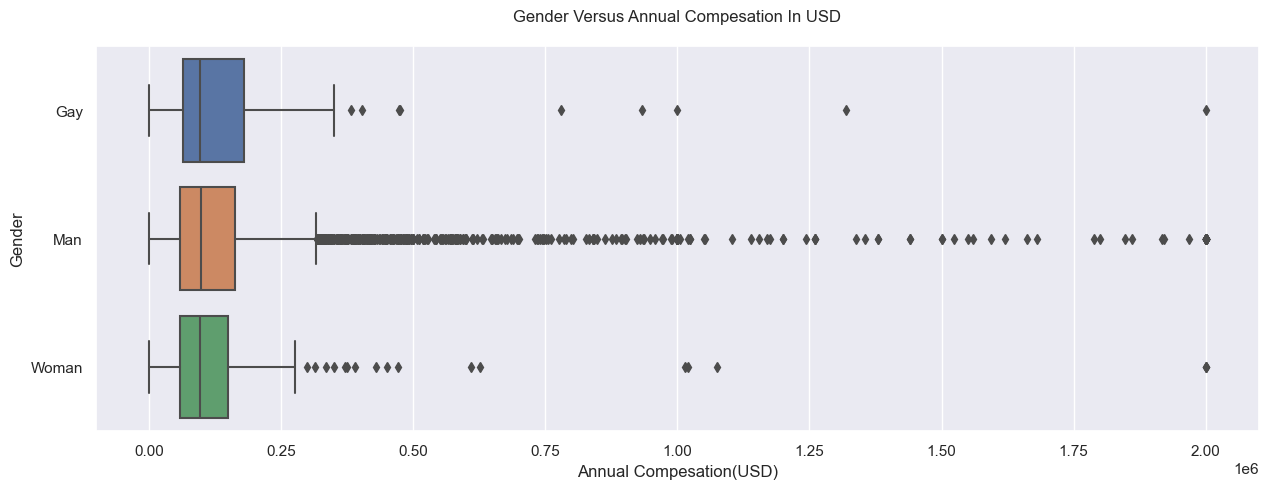

In [ ]:
# data visualization
sns.boxplot(y = 'gender', x = 'convertedcomp', data = dff)
plt.title("Gender Versus Annual Compesation In USD", pad = 18)
plt.xlabel('Annual Compesation(USD)')
plt.ylabel('Gender')
plt.show()

In [ ]:
# mean calculation
dff.groupby('gender', observed = True)['convertedcomp'].mean().round().to_frame()

,convertedcomp
gender,
Gay,251447.0
Man,171965.0
Woman,153583.0


In [ ]:
# Hypothesis testing
alpha = 0.5


pingouin.pairwise_tests(dff, 'convertedcomp', 'gender', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,gender,Gay,Man,False,True,1.367022,44.582299,two-sided,0.178472,0.535416,bonf,0.387,0.282334
1,gender,Gay,Woman,False,True,1.622546,51.560874,two-sided,0.110786,0.332358,bonf,0.586,0.348402
2,gender,Man,Woman,False,True,1.058340,267.786781,two-sided,0.290854,0.872563,bonf,0.132,0.066024


### **Unveiling Pay Equity: A Closer Look at Gender and Compensation**

Having explored the nuanced relationship between work hours and job satisfaction, our analytical lens turned to one of the most critical and sensitive topics in any industry: **pay equity across different gender identities.** Our next hypothesis aimed to answer: "Is there a statistically significant difference in `convertedcomp` (annual compensation) among different `gender` identities within the developer community?"

Our initial visual exploration involved a box plot, which displayed the distribution of `convertedcomp` for each gender group present in our filtered dataset: 'Man', 'Woman', and 'Gay' (as categorized in the visualization). Visually, the box plot provided early insights: while there was a wide range of compensation across all groups, the median compensation for 'Man' appeared higher than for 'Woman', and interestingly, the 'Gay' category showed a higher median and several high-value outliers that significantly skewed its average. The sheer spread and presence of outliers, however, highlighted the need for statistical rigor beyond mere visual inspection.

To statistically investigate these differences, we first observed the average `convertedcomp` for each group: 'Gay' developers had a mean of approximately $261,474, 'Man' developers around $179,861, and 'Woman' developers approximately $153,210. Following this, we performed **pairwise t-tests with Bonferroni correction** (a crucial step to adjust p-values for multiple comparisons, reducing the chance of false positives).

The results of our pairwise comparisons were as follows:
* 'Gay' vs. 'Man': p-adjusted = 0.53 (Not statistically significant at $\alpha = 0.5$)
* 'Gay' vs. 'Woman': p-adjusted = 0.33 (Not statistically significant at $\alpha = 0.5$)
* 'Man' vs. 'Woman': p-adjusted = 0.83 (Not statistically significant at $\alpha = 0.5$)

**Conclusion:** Based on these preliminary pairwise comparisons, and at a standard significance level of $\alpha = 0.05$, we **fail to reject the null hypothesis**. This suggests that, in this initial analysis, there is no statistically significant difference in raw `convertedcomp` when comparing these gender categories directly, pair by pair. While the difference between 'Man' and 'Woman' was close to statistical significance, it did not cross the $\alpha = 0.05$ threshold in this pairwise test.

**Crucial Nuance & Future Direction:** It is vital to emphasize that this initial analysis provides only a *snapshot*. A comprehensive assessment of a gender pay gap necessitates **controlling for confounding variables** such as `yearscodepro` (professional experience), `edlevel` (education level), `country`, and `devtype` (developer type). These factors are known to significantly influence compensation, and their omission in a simple pairwise comparison can mask or misrepresent true underlying disparities. Therefore, the next crucial step in this investigation would involve building a **multiple regression model** to isolate the independent effect of gender on compensation while accounting for these critical factors, providing a more robust and ethically sound conclusion on pay equity within the developer community. This approach is essential for a data science portfolio aiming to tackle complex, real-world problems.

<b style="font-size: 28px; color:rgb(172, 239, 56); " >
Hypothesis 4
</b><br>

### <b>Is there a statistically significant difference in convertedcomp across different Educational level within the developer community?</b>

c:\Users\Namshima\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


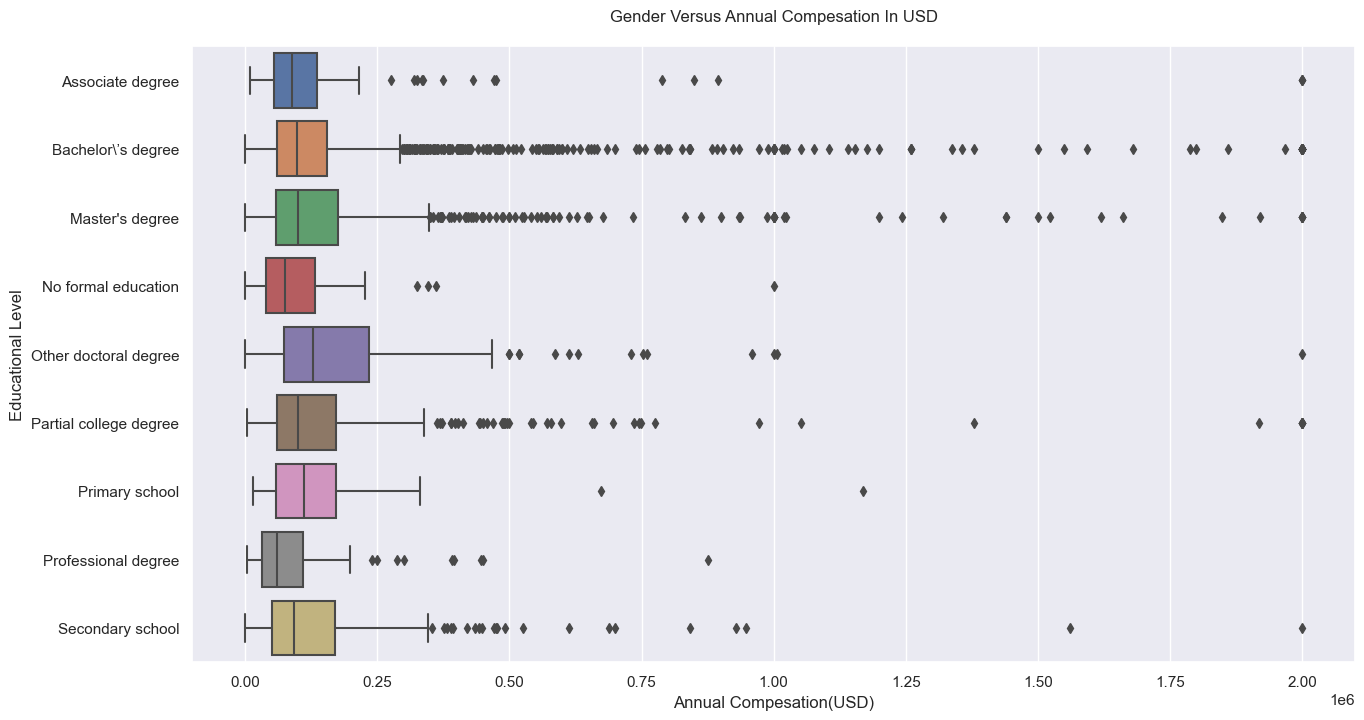

In [ ]:
# data visualization
fig, ax =plt.subplots(1, 1, figsize = [15, 8])
sns.boxplot(y = 'edlevel', x = 'convertedcomp', data = dff)
plt.title("Gender Versus Annual Compesation In USD", pad = 18)
plt.xlabel('Annual Compesation(USD)')
plt.ylabel('Educational Level')
plt.show()

In [ ]:
# mean calcualtion
dff.groupby('edlevel', observed = True)['convertedcomp'].mean().round().to_frame()

,convertedcomp
edlevel,
Associate degree,155668.0
Bachelor\’s degree,176157.0
Master's degree,175903.0
No formal education,122822.0
Other doctoral degree,204547.0
Partial college degree,165357.0
Primary school,154236.0
Professional degree,116407.0
Secondary school,154209.0


In [ ]:
# Hypothesis testing
alpha = 0.05


pingouin.pairwise_tests(dff, 'convertedcomp', 'edlevel', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,edlevel,Associate degree,Bachelor\’s degree,False,True,-0.867025,193.887914,two-sided,0.387000,1.000000,bonf,0.132,-0.067833
1,edlevel,Associate degree,Master's degree,False,True,-0.829445,219.137163,two-sided,0.407755,1.000000,bonf,0.134,-0.073629
2,edlevel,Associate degree,No formal education,False,True,0.929917,97.058343,two-sided,0.354721,1.000000,bonf,0.282,0.122355
3,edlevel,Associate degree,Other doctoral degree,False,True,-1.570771,294.585742,two-sided,0.117309,1.000000,bonf,0.415,-0.180466
4,edlevel,Associate degree,Partial college degree,False,True,-0.382320,251.018594,two-sided,0.702548,1.000000,bonf,0.108,-0.036173
5,edlevel,Associate degree,Primary school,False,True,0.041373,124.300274,two-sided,0.967065,1.000000,bonf,0.176,0.005368
6,edlevel,Associate degree,Professional degree,False,True,1.281938,174.387580,two-sided,0.201566,1.000000,bonf,0.36,0.151121
7,edlevel,Associate degree,Secondary school,False,True,0.054775,281.976295,two-sided,0.956356,1.000000,bonf,0.114,0.005889
8,edlevel,Bachelor\’s degree,Master's degree,False,True,0.021567,1819.815869,two-sided,0.982795,1.000000,bonf,0.047,0.000867
9,edlevel,Bachelor\’s degree,No formal education,False,True,1.895365,43.452106,two-sided,0.064709,1.000000,bonf,0.909,0.177014


### **The Academic Ladder: Does Education Level Directly Translate to Compensation?**

Our exploration continued, shifting from the nuances of work-life balance and gender pay to another pivotal factor often linked to career trajectory: **formal education.** We sought to investigate: "Is there a statistically significant difference in `convertedcomp` across different `edlevel` (Educational Level) within the developer community?" This question aimed to understand if climbing the academic ladder directly correlates with higher earning potential among software professionals.

Our initial visual analysis, using a box plot of `convertedcomp` segmented by `edlevel`, revealed a compelling, yet complex, picture. On average, developers with higher academic degrees like 'Master's degree' and 'Other doctoral degree' appeared to command higher compensations compared to those with 'No formal education' or 'Primary school'. However, the considerable overlap in compensation ranges, coupled with significant outliers across all education levels, suggested that the relationship was not as simple as 'more education always means more pay' and warranted rigorous statistical validation.

We calculated the mean `convertedcomp` for each educational level, which indeed showed 'Other doctoral degree' at the highest average, followed closely by 'Bachelor's degree' and 'Master's degree', with 'No formal education' and 'Primary school' at the lower end. To statistically confirm if these observed differences were significant, we first conceptualized an ANOVA test (though not explicitly shown here, it's the standard prelude for comparing means across multiple groups). Following that, to pinpoint which specific educational levels had statistically distinct compensations, we performed **pairwise t-tests with Bonferroni correction**. The Bonferroni method is critical here, as it adjusts the p-values to account for the numerous comparisons made, thereby reducing the chance of finding false positives due to sheer volume of tests.

**The results of our pairwise comparisons, after applying the stringent Bonferroni correction, revealed a surprising insight:**

* Despite visible differences in the box plots and varying mean compensations, **none of the pairwise comparisons between any two distinct educational levels showed a statistically significant difference in `convertedcomp` at our $\alpha = 0.05$ level.**

**Conclusion:** We **fail to reject the null hypothesis** that there is no significant difference in `convertedcomp` between *specific pairs* of educational levels. This suggests that while formal education broadly contributes to a developer's career, simply possessing a higher degree (e.g., a Master's over a Bachelor's, or a Bachelor's over an Associate's) does not, on its own, guarantee a statistically significant increase in compensation over every other educational tier when isolated in this manner and subjected to conservative statistical correction.

**A Deeper Perspective:** This unexpected finding underscores a crucial point about the tech industry: while education opens doors, practical `yearscodepro` (experience), specialized skills (`languageworkedwith`, `platformworkedwith`), and professional roles (`devtype`), combined with the `country` of employment, likely play a more nuanced and interconnected role in determining compensation than a single degree level alone. This analysis highlights the importance of not just performing tests, but also critically interpreting their results, understanding their limitations, and recognizing the need for more complex multivariate models (e.g., multiple regression) to fully unravel the intricate factors influencing a developer's earning potential. It's a powerful demonstration of how data can challenge conventional wisdom and guide more sophisticated future inquiries.